## Rock Paper Scissors Classifier
Classifing dataset used-
kaggle datasets download -d drgfreeman/rockpaperscissors



In [31]:
!pip install kaggle
kaggleTargetFolder='/content/sample_data/joe_01/rockpaperscissors'
targe_path = Path(kaggleTargetFolder)

##Download the data set from kaggle

In [32]:
api_token = {"username":"kjcmathews","key":"89a4d9e4534a1c441ed300dac6409a01"}
import json
import zipfile
import os
from pathlib import Path
filename='/root/.kaggle/kaggle.json'
dirname = os.path.dirname(filename)
if not os.path.exists(dirname):
    os.makedirs(dirname)
with open(filename, 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
Path(kaggleTargetFolder).mkdir(parents=True, exist_ok=True)
!kaggle datasets download -d drgfreeman/rockpaperscissors -p targe_path


 97% 297M/306M [00:01<00:00, 181MB/s]
100% 306M/306M [00:01<00:00, 162MB/s]


checking the download in the target

In [33]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

file=find('*rockpaperscissors*', targe_path)
file

['/content/sample_data/joe_01/rockpaperscissors/rockpaperscissors.zip']

In [37]:
zip_ref = zipfile.ZipFile(file[0], 'r')
zip_ref.extractall(targe_path)
zip_ref.close()
zip_ref


<zipfile.ZipFile [closed]>

Checking the downloaded image


In [45]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

img=find('*.png*', targe_path)
img[0]

'/content/sample_data/joe_01/rockpaperscissors/rock/BMet9oI6hmx1zdc9.png'

In [46]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

Creating label Rock, Paper, Scissors

In [47]:
classes = ['rock','paper','scissors']

In [48]:
for c in classes:
    print(c)
    verify_images(targe_path/c, delete=True, max_size=500)

rock


paper


scissors


In [49]:
targe_path.ls()

[PosixPath('/content/sample_data/joe_01/rockpaperscissors/rock'),
 PosixPath('/content/sample_data/joe_01/rockpaperscissors/rockpaperscissors.zip'),
 PosixPath('/content/sample_data/joe_01/rockpaperscissors/scissors'),
 PosixPath('/content/sample_data/joe_01/rockpaperscissors/rps-cv-images'),
 PosixPath('/content/sample_data/joe_01/rockpaperscissors/README_rpc-cv-images.txt'),
 PosixPath('/content/sample_data/joe_01/rockpaperscissors/paper')]

In [50]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', test:Union[pathlib.Path, str, NoneType]=None, valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



Learn from current Folder <br>
Train is current Folder


In [53]:
np.random.seed(42)
data = ImageDataBunch.from_folder(targe_path, train=".", valid_pct=0.2,
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
print(data.classes)
len(data.classes),data.c

['paper', 'rock', 'scissors']


(3, 3)

using Convolutional Neural Networks learner from fastai<br>
Used **resnt34** in this Example

In [55]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.359770,0.036448,0.009143,00:50
1,0.155786,0.011949,0.002286,00:51
2,0.073305,0.008902,0.004571,00:53
3,0.055375,0.007936,0.004571,00:50


In [54]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

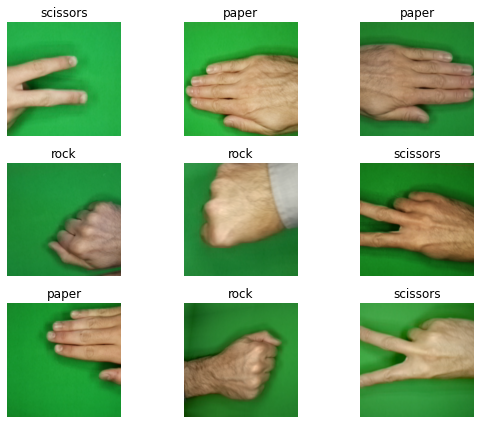

In [56]:
data.show_batch(rows=3, figsize=(8,6))
#data.show_batch(ds_type=DatasetType.Valid)

In [57]:
learn.save('stage-1')

In [58]:
learn.export()

##Result from the data alaysis

In [59]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

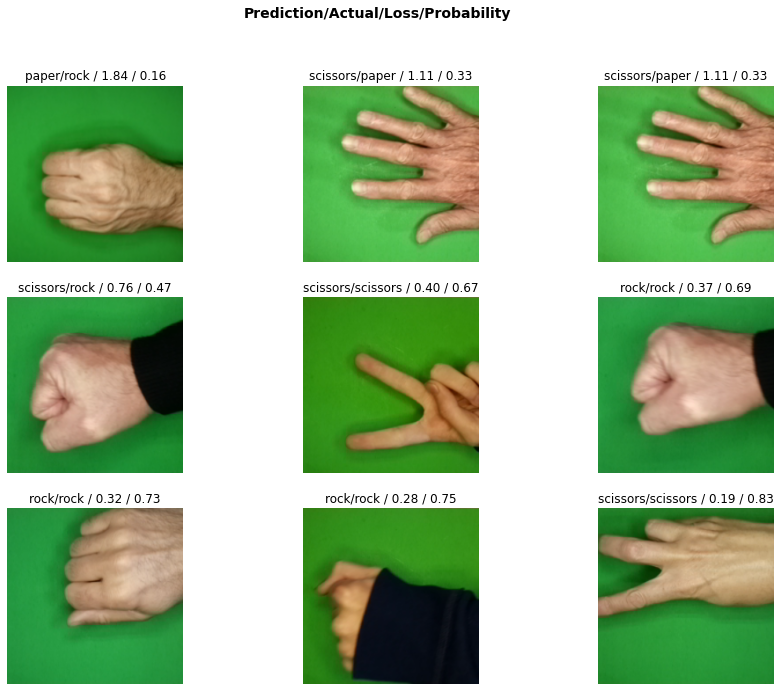

In [60]:
interp.plot_top_losses(9, figsize=(15,11))

In [61]:
interp.most_confused(min_val=1)

[('paper', 'scissors', 2), ('rock', 'paper', 1), ('rock', 'scissors', 1)]

In [11]:
#pat= r'/([^/]+)_\d+.jpg$'
#pat = r'([^/]+)\.(jpg|gif|png)$'